# Exploring and Pre-Processing

### Exploring the Dataset

In [1]:
#Importing our housing prices dataset to Python

import pandas as pd
housing_data = pd.read_csv("train.csv", index_col=0)

In [2]:
#Checking the names of the columns 
housing_data.head(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9254,81531,57,0,1,2,53236,7,1,1990,0,0,6192,9969,736,1,2,8158198.0
1561,78731,88,0,0,79,78649,7,6,1991,1,1,5914,6048,742,0,3,7878473.1


In [37]:
# We will check descriptive statistics of the variables in our dataset

housing_data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03
mean,49576.729875,50.580625,0.507250,0.496750,50.170000,50338.934500,5.520750,5.516000,2005.556250,0.497375,0.499250,5042.218750,5022.901125,550.559500,0.499875,4.972125,4.964092e+06
std,28557.941008,28.814298,0.499979,0.500021,28.938586,28907.555953,2.876518,2.861209,9.317292,0.500024,0.500031,2878.466674,2899.771979,262.338146,0.500031,3.163281,2.855775e+06
min,89.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,1.000000,1.000000,100.000000,0.000000,0.000000,1.031350e+04
25%,25019.500000,26.000000,0.000000,0.000000,25.000000,25223.500000,3.000000,3.000000,1997.000000,0.000000,0.000000,2566.000000,2500.750000,325.000000,0.000000,2.000000,2.511409e+06
50%,49819.000000,51.000000,1.000000,0.000000,50.000000,50693.000000,6.000000,5.000000,2006.000000,0.000000,0.000000,5140.500000,5056.000000,549.000000,0.000000,5.000000,4.987189e+06
75%,73984.250000,75.000000,1.000000,1.000000,76.000000,75592.500000,8.000000,8.000000,2014.000000,1.000000,1.000000,7523.250000,7534.250000,777.000000,1.000000,8.000000,7.405852e+06
max,99952.000000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,10000.000000,10000.000000,1000.000000,1.000000,10.000000,9.998411e+06


In [38]:
#Checking the datatypes

data_types = housing_data.dtypes
print(data_types)

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object


In [39]:
#Checking for null Values

total_null = housing_data.isnull().sum().sum()
print("Total null values in the house pricing dataset:", total_null)

Total null values in the house pricing dataset: 0


#### Checking for the outliers 

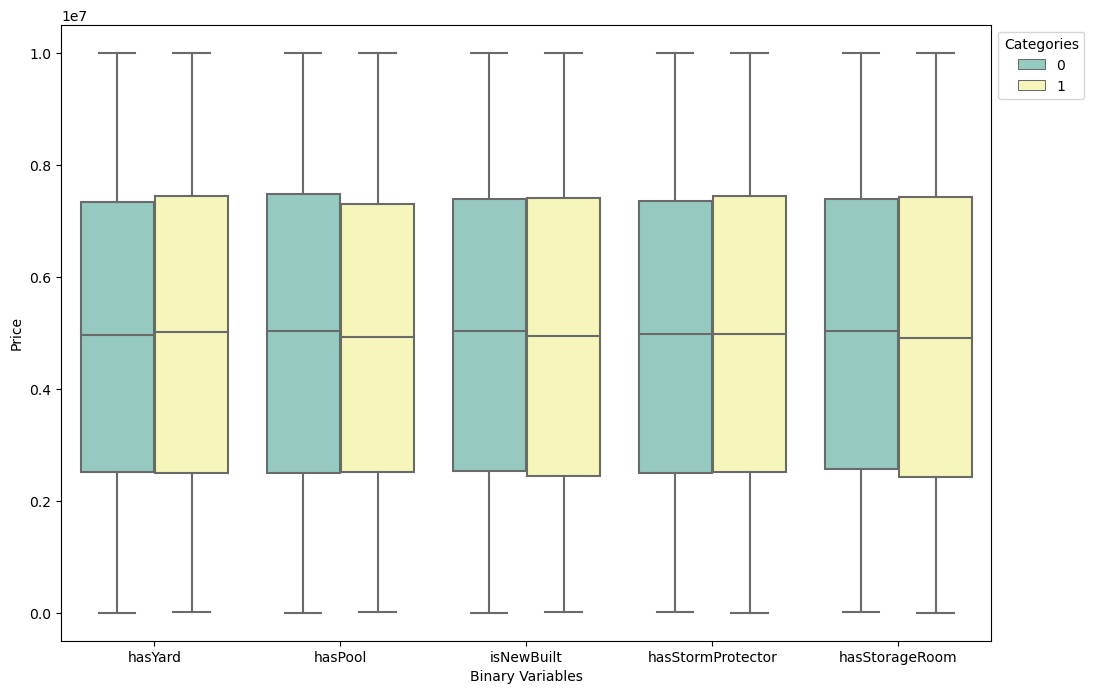

In [3]:
##Checking the distribution of all binary variables against price

import seaborn as sns
import matplotlib.pyplot as plt


binary_variables = ['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

plot_data = housing_data.melt(id_vars='price', value_vars=binary_variables)

plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='price', hue='value', data=plot_data, palette='Set3')


plt.xlabel('Binary Variables')
plt.ylabel('Price')
plt.legend(title='Categories', bbox_to_anchor=(1, 1))


plt.show()


**Now checking it for other remaining variables

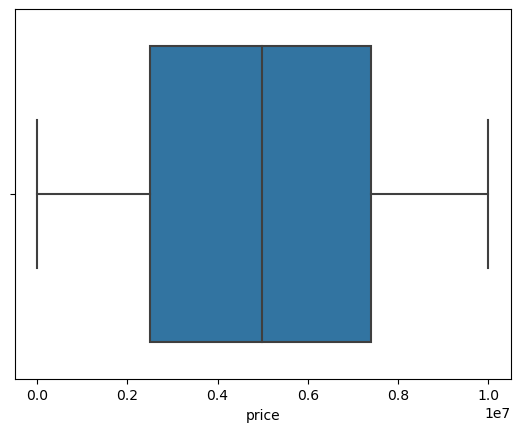

In [8]:
sns.boxplot(x=housing_data['price'])
plt.show()


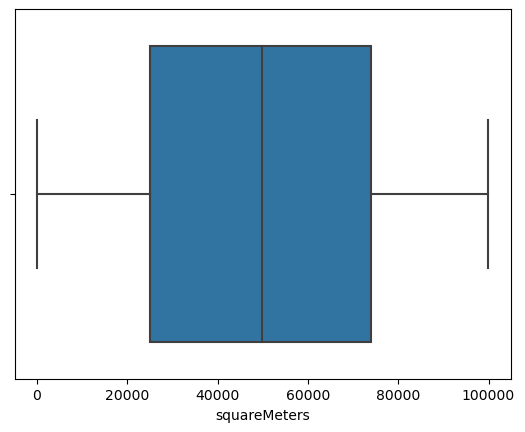

In [9]:
sns.boxplot(x=housing_data['squareMeters'])
plt.show()


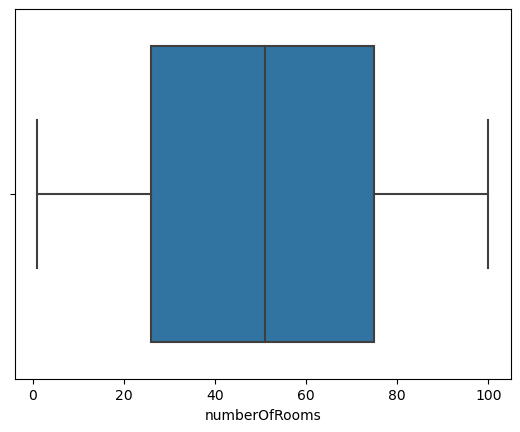

In [10]:
sns.boxplot(x=housing_data['numberOfRooms'])
plt.show()


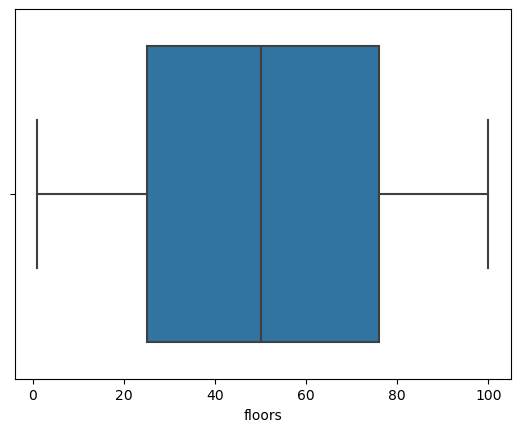

In [11]:
sns.boxplot(x=housing_data['floors'])
plt.show()


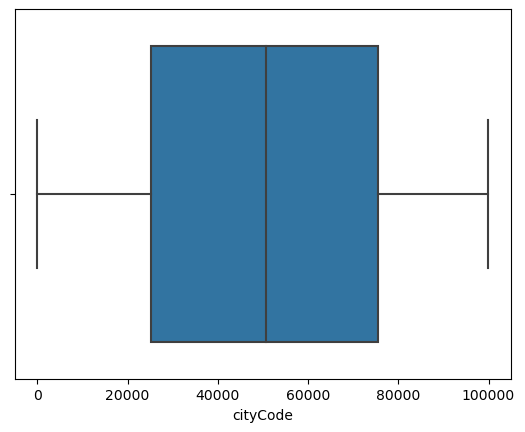

In [12]:
sns.boxplot(x=housing_data['cityCode'])
plt.show()


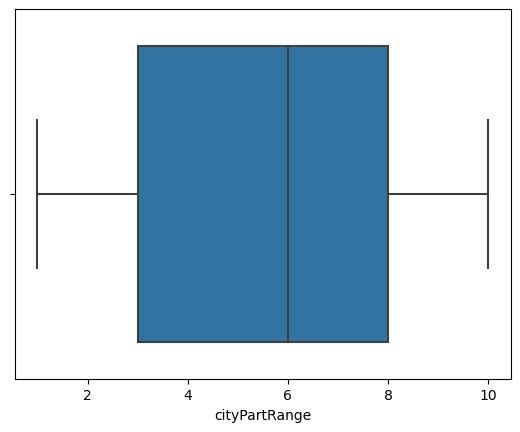

In [13]:
sns.boxplot(x=housing_data['cityPartRange'])
plt.show()

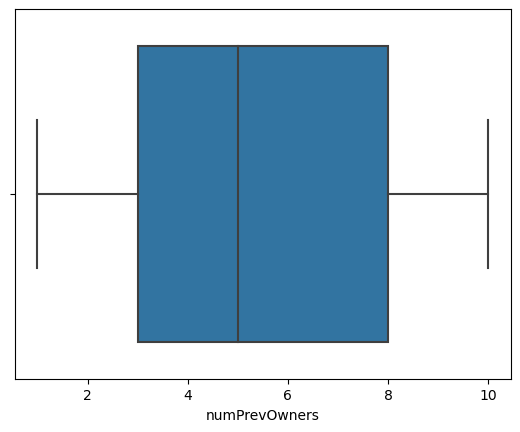

In [14]:
sns.boxplot(x=housing_data['numPrevOwners'])
plt.show()

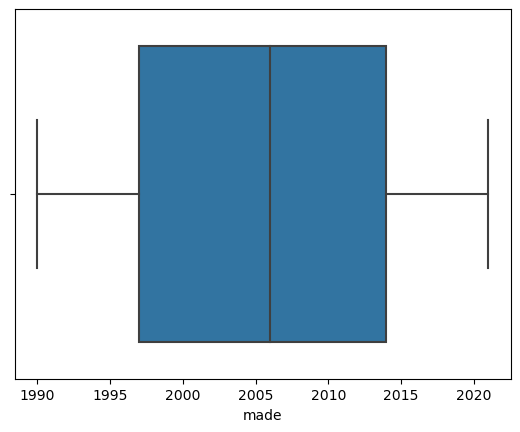

In [15]:
sns.boxplot(x=housing_data['made'])
plt.show()

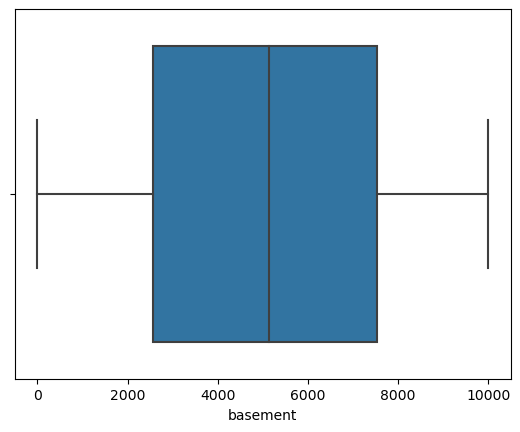

In [16]:
sns.boxplot(x=housing_data['basement'])
plt.show()

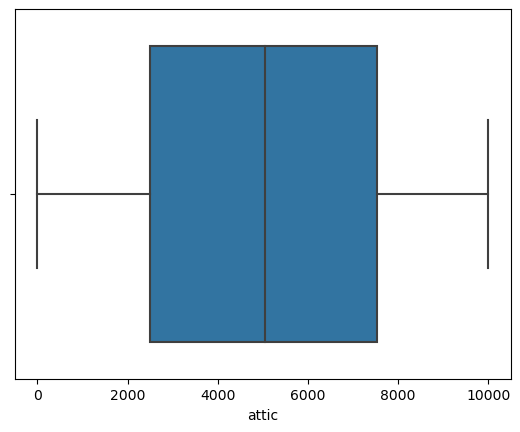

In [17]:
sns.boxplot(x=housing_data['attic'])
plt.show()

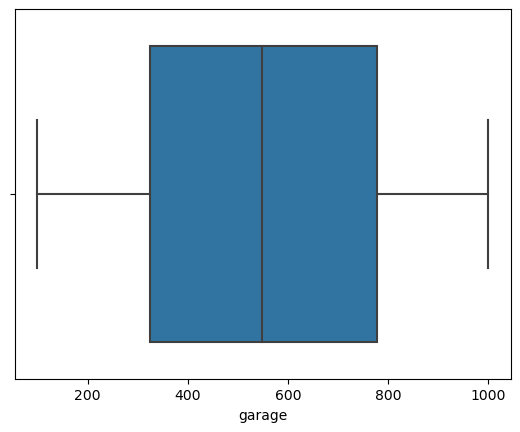

In [18]:
sns.boxplot(x=housing_data['garage'])
plt.show()

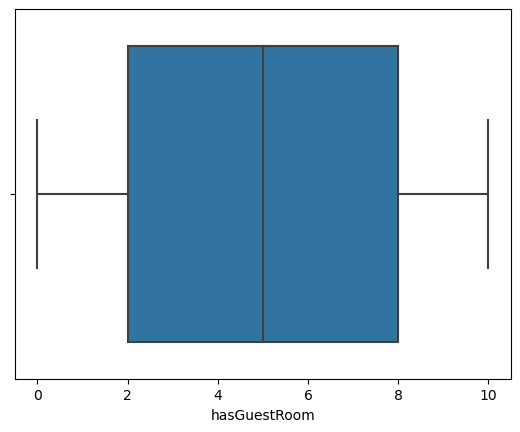

In [19]:
sns.boxplot(x=housing_data['hasGuestRoom'])
plt.show()

### Pre-Processing the data
**Transforming the "price" variable into thousands to make the readibility better and updating the CSV File

In [27]:
housing_data['price_in_thousands'] = housing_data['price'] / 1000
housing_data['price_in_thousands'] = housing_data['price_in_thousands'].round(2)
housing_data = housing_data.drop(columns=['price'])


##Creating another CSV file with the above changes in the dataset

housing_data.to_csv("updated_train.csv", index=False)

In [5]:
# Importing the updated CSV File

housing_dataset = pd.read_csv("updated_train.csv")

In [6]:
# Checking some data rows to confirm the changes applied on the pice column
housing_dataset.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price_in_thousands
0,81531,57,0,1,2,53236,7,1,1990,0,0,6192,9969,736,1,2,8158.20
1,78731,88,0,0,79,78649,7,6,1991,1,1,5914,6048,742,0,3,7878.47
2,78004,71,1,1,96,39708,10,10,1990,1,1,4527,2138,329,1,6,7816.75


# Model Building

## Variables/Features Selection for the Model

### Method 1: Correlation Analysis

In [8]:
correlation_matrix = housing_dataset.corr()
correlation_with_target_var = correlation_matrix["price_in_thousands"].sort_values(ascending=False)
print(correlation_with_target_var)

price_in_thousands    1.000000
squareMeters          0.999999
numPrevOwners         0.014757
cityPartRange         0.007520
numberOfRooms         0.006158
hasYard               0.004892
hasStormProtector     0.004704
cityCode              0.002250
attic                 0.000930
basement              0.000754
hasGuestRoom         -0.000484
floors               -0.002016
made                 -0.006805
isNewBuilt           -0.009581
hasStorageRoom       -0.011755
hasPool              -0.017144
garage               -0.017682
Name: price_in_thousands, dtype: float64


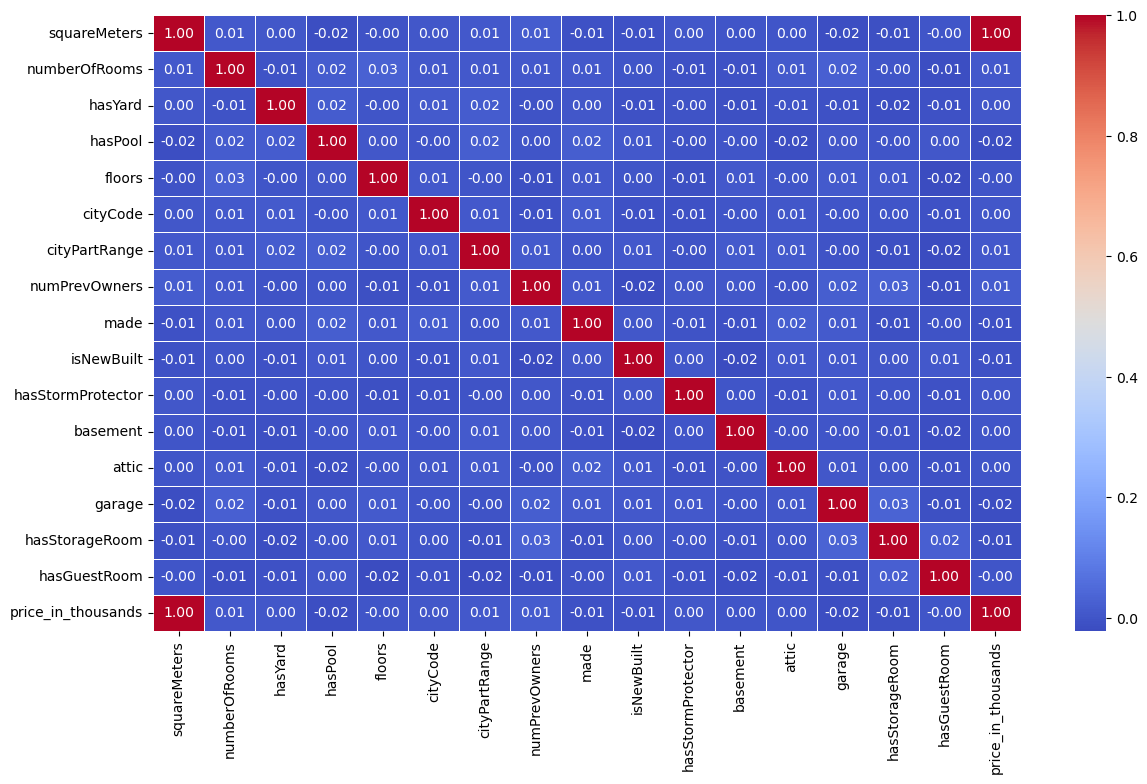

In [9]:
#Checking correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.6)
plt.show()


### Method 2: Feature Importance Technique using Random Forest Regressor

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


y = housing_dataset['price_in_thousands']
X = housing_dataset.drop(['price_in_thousands'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


              Feature    Importance
0        squareMeters  9.999986e-01
4              floors  1.475493e-07
1       numberOfRooms  1.409423e-07
5            cityCode  1.398622e-07
11           basement  1.392205e-07
12              attic  1.379543e-07
13             garage  1.358421e-07
8                made  1.200776e-07
6       cityPartRange  9.874166e-08
7       numPrevOwners  9.251995e-08
15       hasGuestRoom  9.214397e-08
3             hasPool  3.844459e-08
2             hasYard  3.743057e-08
9          isNewBuilt  3.142339e-08
14     hasStorageRoom  2.985400e-08
10  hasStormProtector  2.889383e-08


Important Features: squareMeters, floors, numberOfRooms, cityCode, basement

### Method 3: LASSO Regression

In [244]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


y = housing_dataset['price_in_thousands']
X = housing_dataset.drop(['price_in_thousands'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso_model = Lasso(alpha=0.1) 


lasso_model.fit(X_train_scaled, y_train)


lasso_feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})


selected_features = lasso_feature_coefficients[lasso_feature_coefficients['Coefficient'] != 0]

print(selected_features)


         Feature  Coefficient
0   squareMeters  2857.630567
2        hasYard     1.404884
3        hasPool     1.416153
4         floors     1.445279
6  cityPartRange     0.049013


Result: Selected variables through LASSO are: SquareMeters, hasYard, hasPool, floors, cityPartRange

### Method 4: Sequential Feature Selector

In [12]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


y = housing_dataset['price_in_thousands']

X = housing_dataset.drop(['price_in_thousands'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

sfs = SequentialFeatureSelector(lr_model, forward=True, k_features='best', scoring='neg_mean_squared_error', cv=4)

sfs = sfs.fit(X_train, y_train)

selected_features = list(sfs.k_feature_idx_)
selected_columns = X_train.columns[selected_features]


print(selected_columns)

Index(['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange',
       'isNewBuilt', 'hasStormProtector', 'hasStorageRoom'],
      dtype='object')


**Common variable in all of the above 4 methods was SquareMeters. floors was selected by three methods, and hasPool,hasYard, cityPartRange were included by two methods, so we will continue with these 5 variables.

## Model Selection

### Model 1: Linear Regression Model

**To procede with Linear Regression Model, we should first check its assumptions 

#### Assumption 1: Linearity  

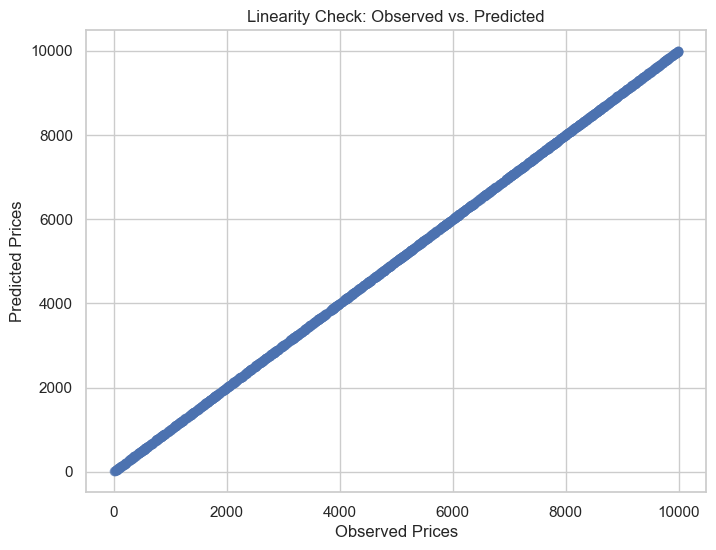

In [253]:

selected_features = ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']

y = housing_dataset['price_in_thousands']
X = housing_dataset[selected_features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


# Ploting the observed vs Preidcted in a scatterr plot  blow:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Linearity Check: Observed vs. Predicted')
plt.xlabel('Observed Prices')
plt.ylabel('Predicted Prices')
plt.show()

#### Assumption 2: Independence of Residuals

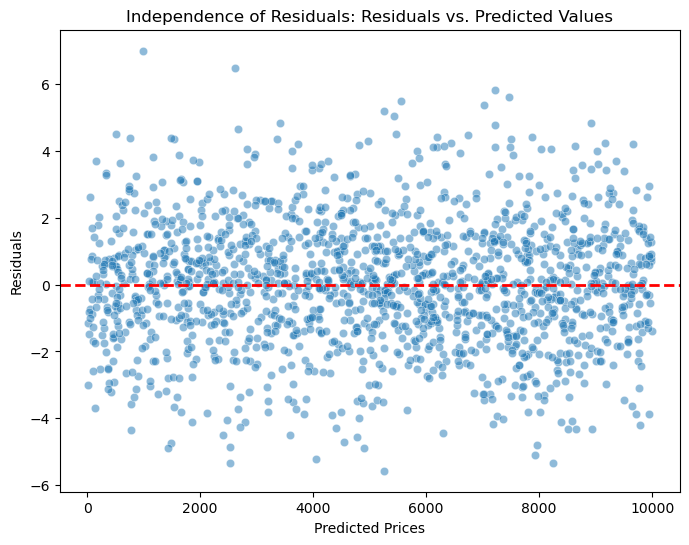

In [203]:

residuals = y_test - y_pred

# Ploting residuals against the predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Independence of Residuals: Residuals vs. Predicted Values')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


#### Assumption 3: Homoscedasticity using scatter plot and Goldfeld-Quandt Test

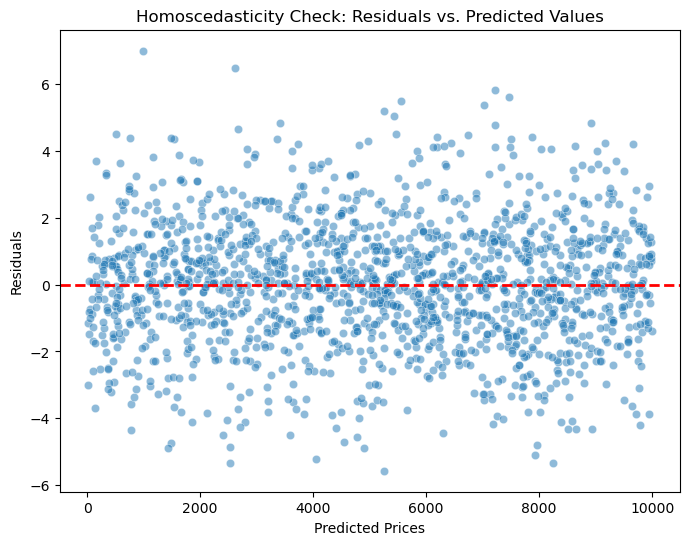

Goldfeld-Quandt Test Statistic: 0.9463551209453146, p-value: 0.7809949552054746


In [210]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

#checking Homoscedasticity through scatter plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Checking homoscedasticity by applying the Goldfeld-Quandt Test: 
gq_test_statistic, gq_p_value, _ = het_goldfeldquandt(residuals, X_test)
print(f'Goldfeld-Quandt Test Statistic: {gq_test_statistic}, p-value: {gq_p_value}')


#### Assumption 4: Normality of the Residuals 

Text(0.5, 1.0, 'Histogram of Residuals')

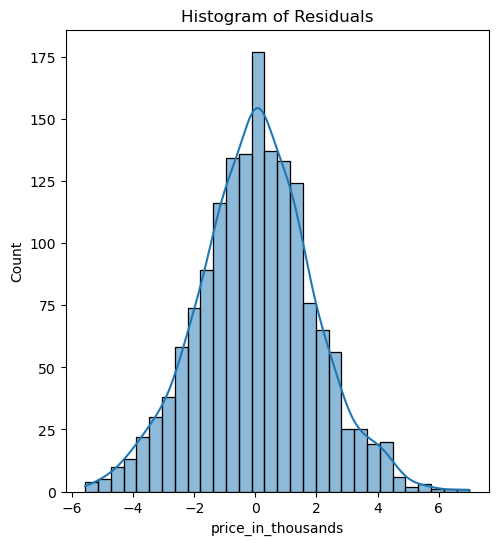

In [301]:
import scipy.stats as stats


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')




**Result: As all important assumptions are met, we will run regression model and will check the accuracy of the model by calculating Root Square Mean Value of the Model.

#### Building the linear regression model

In [13]:
from sklearn.linear_model import LinearRegression


# Selecting features that was common by at least two of the selecting features techniques:
selected_features = ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']

y = housing_dataset['price_in_thousands']

X = housing_dataset[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)



##### Evaluating the performance of the model, 

In [14]:
# Calculating Root Mean Squared Error
from sklearn.metrics import mean_squared_error

import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse}")


Linear Regression - Root Mean Squared Error (RMSE): 1.8593067819080173


### Model 2: Random Forest Regression Model

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

y = housing_dataset['price_in_thousands']

selected_features = ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']

X = housing_dataset[selected_features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
    
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)





##### Evaluating the performance of the model

In [252]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Random Forest Regression - Root Mean Squared Error (RMSE): {rmse}")

Random Forest Regression - Root Mean Squared Error (RMSE): 3.7083356637716136


### Model 3: Neural Network

In [254]:
from tensorflow import keras
from tensorflow.keras import layers



y = housing_dataset['price_in_thousands']

selected_features = ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']

X = hdata[selected_features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  
])


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=30, batch_size=36, validation_split=0.2, verbose=0)


predictions = model.predict(X_test).flatten()







50/50 [==============================] - 0s 2ms/step


##### Evaluating the performance of the model, 

In [255]:

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Neural Network Regression - Root Mean Squared Error (RMSE): {rmse}")


Neural Network Regression - Root Mean Squared Error (RMSE): 4.078216155896338


# Training Phase

 **After comparing the RMSE values among various models, the Linear Regression Model emerged as the top performer for our dataset. Therefore, we will utilize the Linear Regression Model to predict prices for our test dataset.

In [15]:

# Selecting features that was common by at least two of the selecting features techniques:
selected_features = ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']

y = housing_dataset['price_in_thousands']

X = housing_dataset[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)


# Application Phase 

In [16]:
## Importing the test dataset

test_data = pd.read_csv("test.csv", index_col=0)

## Exploring the Data

In [17]:
test_data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,51043.736500,49.469500,0.514500,0.497000,50.70150,49771.692500,5.467500,5.544500,2005.217500,0.506000,0.502500,4996.644500,5048.448500,563.368000,0.515500,5.084500
std,29602.528089,28.816354,0.499915,0.500116,28.69392,29402.738297,2.854298,2.839023,9.268557,0.500089,0.500119,2870.199508,2873.100341,260.708765,0.499885,3.227626
min,123.000000,1.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,0.000000,7.000000,100.000000,0.000000,0.000000
25%,25611.000000,24.000000,0.000000,0.000000,26.00000,22879.250000,3.000000,3.000000,1997.000000,0.000000,0.000000,2506.500000,2626.000000,337.000000,0.000000,2.000000
50%,51502.000000,50.000000,1.000000,0.000000,51.00000,50678.000000,5.000000,5.000000,2005.000000,1.000000,1.000000,4893.000000,5021.500000,574.000000,1.000000,5.000000
75%,77393.000000,74.000000,1.000000,1.000000,75.00000,75920.500000,8.000000,8.000000,2013.000000,1.000000,1.000000,7478.500000,7570.000000,782.250000,1.000000,8.000000
max,99999.000000,100.000000,1.000000,1.000000,100.00000,99940.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,9996.000000,9994.000000,1000.000000,1.000000,10.000000


In [18]:
#Checking for null values

null_values = test_data.isnull().sum()
print("Null Values in Test Dataset:")
print(null_values)



Null Values in Test Dataset:
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64


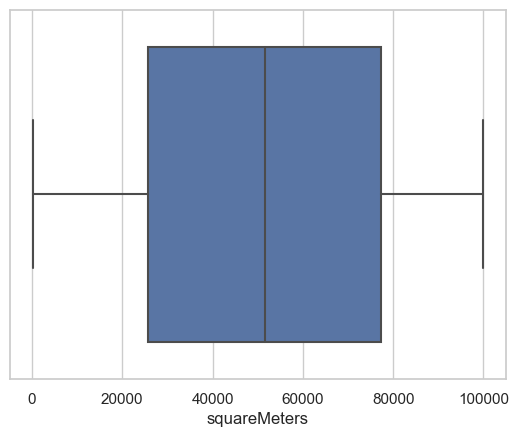

In [256]:
#Checking the outliers for the variables of interst  ('squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange)


sns.boxplot(x=test_data['squareMeters'])
plt.show()

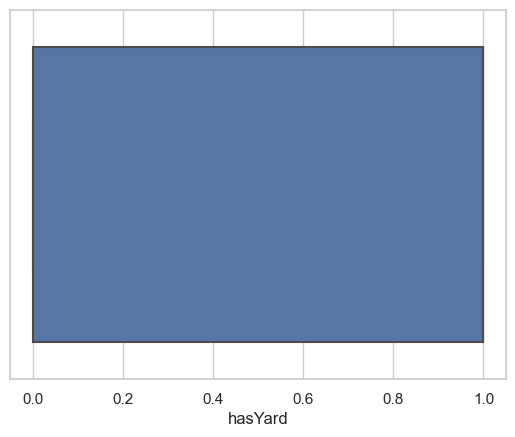

In [224]:
sns.boxplot(x=test_data['hasYard'])
plt.show()

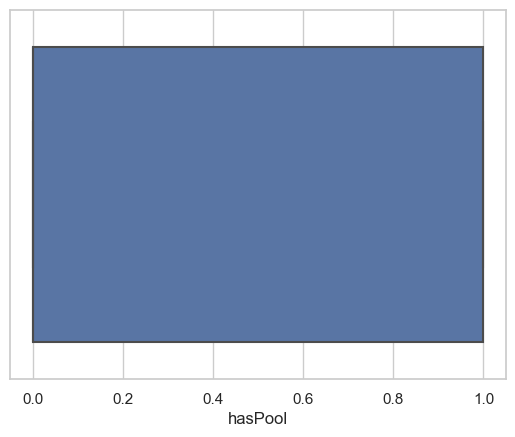

In [225]:

sns.boxplot(x=test_data['hasPool'])
plt.show()

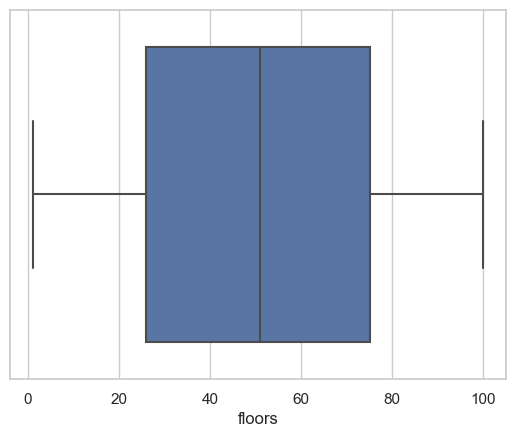

In [226]:
sns.boxplot(x=test_data['floors'])
plt.show()

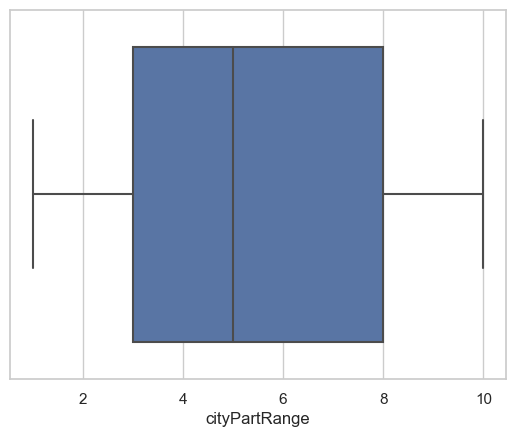

In [227]:
sns.boxplot(x=test_data['cityPartRange'])
plt.show()

## Prediction of the price

In [21]:
# Prediction price based on the Linear Regression Model Developed in the training phase

#Considering the variables that were used for developing of the model

X_test = test_data[['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']]

# Make predictions based on the linear regression model 
predictions_test = lr_model.predict(X_test)


test_data['predicted_price_in_thousands'] = predictions_test

# Display the test dataset with predicted prices
print(test_data[['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange', 'predicted_price_in_thousands']])



      squareMeters  hasYard  hasPool  floors  cityPartRange  \
6252         79553        1        0      61              8   
4684         37047        1        1      87              3   
1731         85476        1        0      44              9   
4742         64209        1        1      55              5   
4521         64550        1        1      68              7   
...            ...      ...      ...     ...            ...   
6412         69418        1        1      70              3   
8285         81453        1        0      83              6   
7853         19446        1        0      58              1   
1095         29392        1        0      45              9   
6929         70346        1        0      83              4   

      predicted_price_in_thousands  
6252                   7962.403059  
4684                   3715.958906  
1731                   8553.844844  
4742                   6430.553920  
4521                   6465.452890  
...                  

In [23]:
# We will export the data as well to CSV file to have the dataset with the predicted price

test_data.to_csv("Test_data_with_predicted_price.csv")

# Checking the prediction quality of the model

**As we don't have the actual values of the target variable (price) for the test dataset, we are not able to calculate RMSE for the test dataset.